# 池の水の波紋の普遍性を波動方程式を実際に解くことで見る

『くりこみ理論の地平』（ https://www.gakushuin.ac.jp/~881791/r.htm ）で出てくる「池に小石を投げ入れた時にできる水の波紋」を波動方程式を実際に解くことで再現する。様々な種類の小石を投げ入れることに合わせて、初期条件のを数種類用意する。それぞれの初期条件で小石の投げ入れから十分時間のたった後の波紋を見比べ、初期条件の詳細には依存しないことを見る。

波動方程式は
$$
\frac{\partial^2}{\partial t^2} u(x,y,t) = v^2 \left( \frac{\partial^2}{\partial x^2} u(x,y,t) + \frac{\partial^2}{\partial y^2} u(x,y,t) \right)
$$
で与えられる。ここでは差分法を用いて数値計算を行った。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#分割数
num_x = 100
num_y = 100
num_t = 100

#最大値・最小値
min_x = -10.0
max_x = 10.0
min_y = -10.0
max_y = 10.0
min_t = 0.0
max_t = 100.0

#x,y,tの配列
X = np.linspace(min_x , max_x , num_x)
Y = np.linspace(min_y , max_y , num_y)
X , Y = np.meshgrid(X, Y) #(x,y)のgridにする
T = np.linspace(min_t , max_t , num_t)

#差分の定義
dx = (max_x - min_x)/num_x
dy = (max_y - min_y)/num_y
dt = (max_t - min_t)/num_t

#波の速さ
v = 0.1

#波動関数（すべて0の配列）
u = np.zeros((num_x , num_y , num_t))

## 初期条件１
初期条件としてxy対称なGauss分布
$$
u(x , y , 0) = -\frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(- \frac{x^2 + y^2}{2\sigma^2} \right)
$$
を考える。ここでは$\sigma^2 = 0.05$とした。また、池に石を落とすことをイメージして先頭にマイナスの符号をつけた。

In [2]:
#初期条件１

sigma2 = 0.05 #分散

u[:,:,0] = -(1/np.sqrt(2*np.pi*sigma2))*np.exp(-(X**2 + Y**2)/(2*sigma2))

In [3]:
#方程式を解く

for t in range(1 , num_t - 1):
    for x in range(1 , num_x - 1):
        for y in range(1 , num_y - 1):
            ddx_u = (u[x + 1 , y , t] - 2*u[x , y , t] + u[x - 1 , y , t]) #du^2/dx^2
            ddy_u = (u[x , y + 1 , t] - 2*u[x , y , t] + u[x , y - 1 , t]) #du^2/dy^2
            u[x, y , t + 1] = ((dt*v/dx)**2)*ddx_u + ((dt*v/dy)**2)*ddy_u + 2*u[x , y , t] - u[x , y , t - 1]

(-2.0, 10.0)

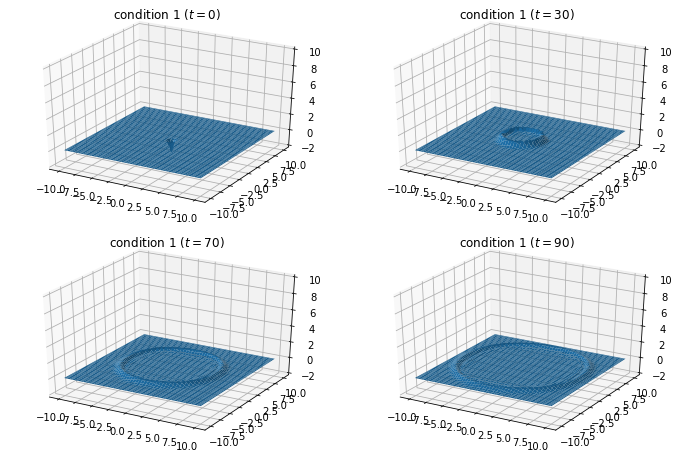

In [4]:
#グラフ

fig = plt.figure(figsize=(12, 8))

#subplot（tを4点）
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

#グラフどうしの間隔
plt.subplots_adjust(wspace=0.1, hspace=0.1)

#プロット
surf_1 = ax1.plot_surface(X, Y, u[:,:,0])
surf_10 = ax2.plot_surface(X, Y, u[:,:,30])
surf_50 = ax3.plot_surface(X, Y, u[:,:,70])
surf_99 = ax4.plot_surface(X, Y, u[:,:,90])

#グラフタイトル
ax1.set_title(r"condition 1 ($t = 0$)")
ax2.set_title(r"condition 1 ($t = 30$)")
ax3.set_title(r"condition 1 ($t = 70$)")
ax4.set_title(r"condition 1 ($t = 90$)")

ax1.set_zlim(-2.0 , 10.0)
ax2.set_zlim(-2.0 , 10.0)
ax3.set_zlim(-2.0 , 10.0)
ax4.set_zlim(-2.0 , 10.0)

#plt.savefig('condition_1') #画像保存

## 初期条件２
初期条件として
$$
u(x , y , 0) =
\begin{cases}
-1 \qquad (48 \leq x \leq 52 \land 48 \leq y \leq 52) \\
0 \qquad (\text{others})
\end{cases}
$$
を考える。

In [5]:
#初期条件２

#波動関数の初期化
u = np.zeros((num_x , num_y , num_t))

u[48:52,48:52,0] = -1.0

In [6]:
#方程式を解く

for t in range(1 , num_t - 1):
    for x in range(1 , num_x - 1):
        for y in range(1 , num_y - 1):
            ddx_u = (u[x + 1 , y , t] - 2*u[x , y , t] + u[x - 1 , y , t]) #du^2/dx^2
            ddy_u = (u[x , y + 1 , t] - 2*u[x , y , t] + u[x , y - 1 , t]) #du^2/dy^2
            u[x, y , t + 1] = ((dt*v/dx)**2)*ddx_u + ((dt*v/dy)**2)*ddy_u + 2*u[x , y , t] - u[x , y , t - 1]

(-2.0, 10.0)

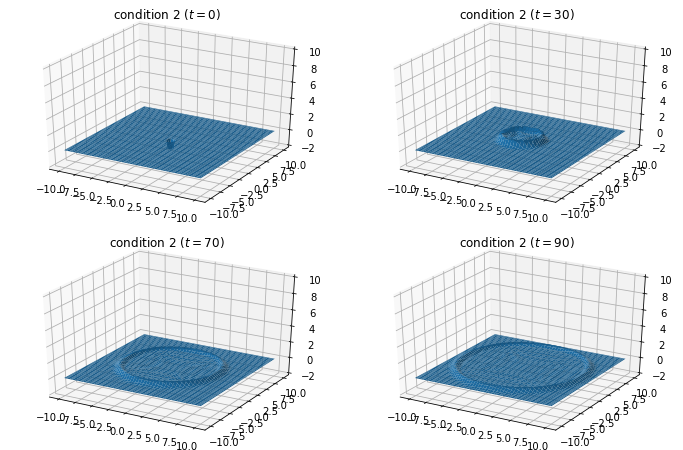

In [7]:
#グラフ

fig = plt.figure(figsize=(12, 8))

#subplot（tを4点）
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

#グラフどうしの間隔
plt.subplots_adjust(wspace=0.1, hspace=0.1)

#プロット
surf_1 = ax1.plot_surface(X, Y, u[:,:,0])
surf_10 = ax2.plot_surface(X, Y, u[:,:,30])
surf_50 = ax3.plot_surface(X, Y, u[:,:,70])
surf_99 = ax4.plot_surface(X, Y, u[:,:,90])

#グラフタイトル
ax1.set_title(r"condition 2 ($t = 0$)")
ax2.set_title(r"condition 2 ($t = 30$)")
ax3.set_title(r"condition 2 ($t = 70$)")
ax4.set_title(r"condition 2 ($t = 90$)")

ax1.set_zlim(-2.0 , 10.0)
ax2.set_zlim(-2.0 , 10.0)
ax3.set_zlim(-2.0 , 10.0)
ax4.set_zlim(-2.0 , 10.0)

#plt.savefig('condition_2') #画像保存

## 初期条件３
$48 \leq x \leq 52$かつ$48 \leq y \leq 52$の領域に$-2 \leq u(x,y,t) \leq 0$の値をランダムに入れる。

In [8]:
#初期条件３

#波動関数の初期化
u = np.zeros((num_x , num_y , num_t))

u[48:52,48:52,0] = -np.random.random()*2.0

In [9]:
#方程式を解く

for t in range(1 , num_t - 1):
    for x in range(1 , num_x - 1):
        for y in range(1 , num_y - 1):
            ddx_u = (u[x + 1 , y , t] - 2*u[x , y , t] + u[x - 1 , y , t]) #du^2/dx^2
            ddy_u = (u[x , y + 1 , t] - 2*u[x , y , t] + u[x , y - 1 , t]) #du^2/dy^2
            u[x, y , t + 1] = ((dt*v/dx)**2)*ddx_u + ((dt*v/dy)**2)*ddy_u + 2*u[x , y , t] - u[x , y , t - 1]

(-2.0, 10.0)

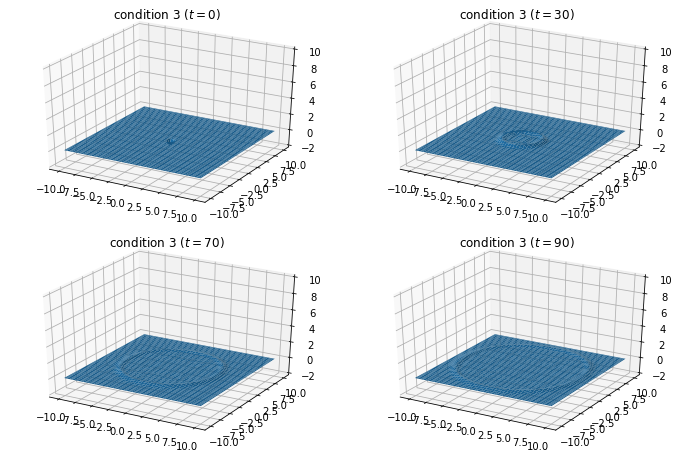

In [10]:
#グラフ

fig = plt.figure(figsize=(12, 8))

#subplot（tを4点）
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

#グラフどうしの間隔
plt.subplots_adjust(wspace=0.1, hspace=0.1)

#プロット
surf_1 = ax1.plot_surface(X, Y, u[:,:,0])
surf_10 = ax2.plot_surface(X, Y, u[:,:,30])
surf_50 = ax3.plot_surface(X, Y, u[:,:,70])
surf_99 = ax4.plot_surface(X, Y, u[:,:,90])

#グラフタイトル
time_2 = num_t
ax1.set_title(r"condition 3 ($t = 0$)")
ax2.set_title(r"condition 3 ($t = 30$)")
ax3.set_title(r"condition 3 ($t = 70$)")
ax4.set_title(r"condition 3 ($t = 90$)")

ax1.set_zlim(-2.0 , 10.0)
ax2.set_zlim(-2.0 , 10.0)
ax3.set_zlim(-2.0 , 10.0)
ax4.set_zlim(-2.0 , 10.0)

#plt.savefig('condition_3') #画像保存